*Persiapan PUSTAKA*

In [25]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [27]:
# Rentang variabel input dan output
kualitas_range = np.arange(0, 11, 1)
permintaan_range = np.arange(0, 11, 1)
harga_range = np.arange(0, 101, 1)

# Fungsi keanggotaan untuk kualitas
kualitas_rendah = fuzz.trimf(kualitas_range, [0, 0, 5])
kualitas_sedang = fuzz.trimf(kualitas_range, [2, 5, 8])
kualitas_tinggi = fuzz.trimf(kualitas_range, [5, 10, 10])

# Fungsi keanggotaan untuk permintaan
permintaan_rendah = fuzz.trimf(permintaan_range, [0, 0, 5])
permintaan_sedang = fuzz.trimf(permintaan_range, [2, 5, 8])
permintaan_tinggi = fuzz.trimf(permintaan_range, [5, 10, 10])

# Fungsi keanggotaan untuk harga (output dalam bentuk nilai crisp)
harga_murah = fuzz.trimf(harga_range, [0, 0, 50])
harga_sedang = fuzz.trimf(harga_range, [20, 50, 80])
harga_mahal = fuzz.trimf(harga_range, [50, 100, 100])


In [19]:
def fuzzifikasi(nilai, himpunan):
    """Menghitung derajat keanggotaan untuk sebuah nilai pada suatu himpunan fuzzy."""
    return fuzz.interp_membership(himpunan[0], himpunan[1], nilai)


In [33]:
def inferensi_tsukamoto(kualitas_input, permintaan_input):
    """Melakukan inferensi fuzzy menggunakan metode Tsukamoto."""
    # Hitung derajat keanggotaan untuk kualitas
    µ_kualitas_rendah = fuzzifikasi(kualitas_input, (kualitas_range, kualitas_rendah))
    µ_kualitas_sedang = fuzzifikasi(kualitas_input, (kualitas_range, kualitas_sedang))
    µ_kualitas_tinggi = fuzzifikasi(kualitas_input, (kualitas_range, kualitas_tinggi))

    # Hitung derajat keanggotaan untuk permintaan
    µ_permintaan_rendah = fuzzifikasi(permintaan_input, (permintaan_range, permintaan_rendah))
    µ_permintaan_sedang = fuzzifikasi(permintaan_input, (permintaan_range, permintaan_sedang))
    µ_permintaan_tinggi = fuzzifikasi(permintaan_input, (permintaan_range, permintaan_tinggi))

    # Daftar aturan fuzzy (α_predikat dan nilai crisp output)
    aturan = [
        (min(µ_kualitas_rendah, µ_permintaan_rendah), 25),  # harga murah
        (min(µ_kualitas_rendah, µ_permintaan_sedang), 25),  # harga murah
        (min(µ_kualitas_rendah, µ_permintaan_tinggi), 50),  # harga sedang
        (min(µ_kualitas_sedang, µ_permintaan_rendah), 25),  # harga murah
        (min(µ_kualitas_sedang, µ_permintaan_sedang), 50),  # harga sedang
        (min(µ_kualitas_sedang, µ_permintaan_tinggi), 75),  # harga mahal
        (min(µ_kualitas_tinggi, µ_permintaan_rendah), 50),  # harga sedang
        (min(µ_kualitas_tinggi, µ_permintaan_sedang), 75),  # harga mahal
        (min(µ_kualitas_tinggi, µ_permintaan_tinggi), 75)   # harga mahal
    ]

    # Perhitungan defuzzifikasi dengan rata-rata berbobot
    pembilang = sum(α * z for α, z in aturan)
    penyebut = sum(α for α, _ in aturan)

    if penyebut == 0:
        return 0  # Menghindari pembagian dengan nol

    return pembilang / penyebut


In [29]:
# Input
kualitas_input = 7
permintaan_input = 8

# Hitung output fuzzy dengan metode Tsukamoto
hasil_harga = inferensi_tsukamoto(kualitas_input, permintaan_input)

# Cetak hasil
print(f"Harga yang dihasilkan: {hasil_harga:.2f}")


Harga yang dihasilkan: 75.00


GRAFIK DERAJAT KEANGGOTAAN 

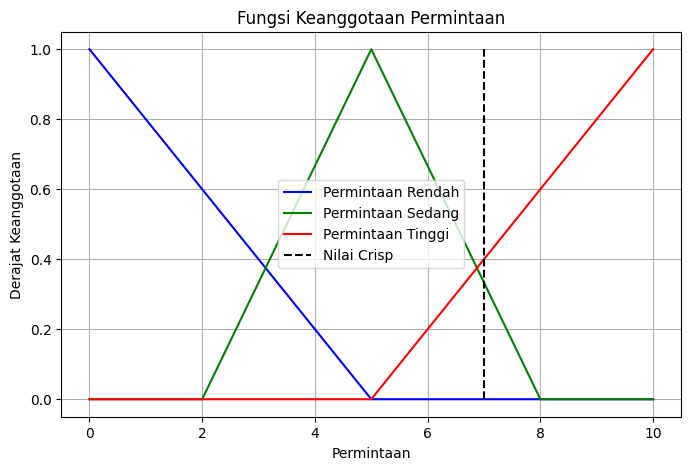

In [34]:
# Plot fungsi keanggotaan
plt.figure(figsize=(8, 5))
plt.plot(permintaan_range, permintaan_rendah, 'b', label='Permintaan Rendah')
plt.plot(permintaan_range, permintaan_sedang, 'g', label='Permintaan Sedang')
plt.plot(permintaan_range, permintaan_tinggi, 'r', label='Permintaan Tinggi')

plt.vlines(kualitas_input, 0, 1, linestyles='dashed', colors='black', label='Nilai Crisp')


plt.xlabel('Permintaan')
plt.ylabel('Derajat Keanggotaan')
plt.title('Fungsi Keanggotaan Permintaan')
plt.legend()
plt.grid()
plt.show()

<h1> Requrements yang diperlukan<h1>